In [11]:
import mne
mne.set_log_level('error')  # reduce extraneous MNE output
import matplotlib.pyplot as plt
import numpy as np
from utils import *

file_name = "session1_sub1_multigrasp_realMove"
raw = mne.io.read_raw_brainvision( '/media/pankhi/Seagate Backup Plus Drive/Susmita/RawData/RawData/%s.vhdr'%file_name, preload=True)

In [2]:
events, event_dict = mne.events_from_annotations(raw)

In [5]:
events[:10]

array([[    0,     0, 99999],
       [  100,     0, 10001],
       [38696,     0,    13],
       [46244,     0,     2],
       [54151,     0,    21],
       [64264,     0,     8],
       [71819,     0,     6],
       [79396,     0,    61],
       [89490,     0,     8],
       [97041,     0,     1]])

In [6]:
event_dict

{'Comment/actiCAP Active Shield On': 10001,
 'New Segment/': 99999,
 'Stimulus/S  1': 1,
 'Stimulus/S  2': 2,
 'Stimulus/S  6': 6,
 'Stimulus/S  8': 8,
 'Stimulus/S 11': 11,
 'Stimulus/S 13': 13,
 'Stimulus/S 14': 14,
 'Stimulus/S 21': 21,
 'Stimulus/S 61': 61}

In [12]:
event_mapping = {
    "Cylindrical":8, 'Spherical':11,"Lumbrical":21,"Rest":61, "mismatch1":1, "mismatch2":2, "mismatch6":6, "mismatch13":13, "mismatch14":14

}

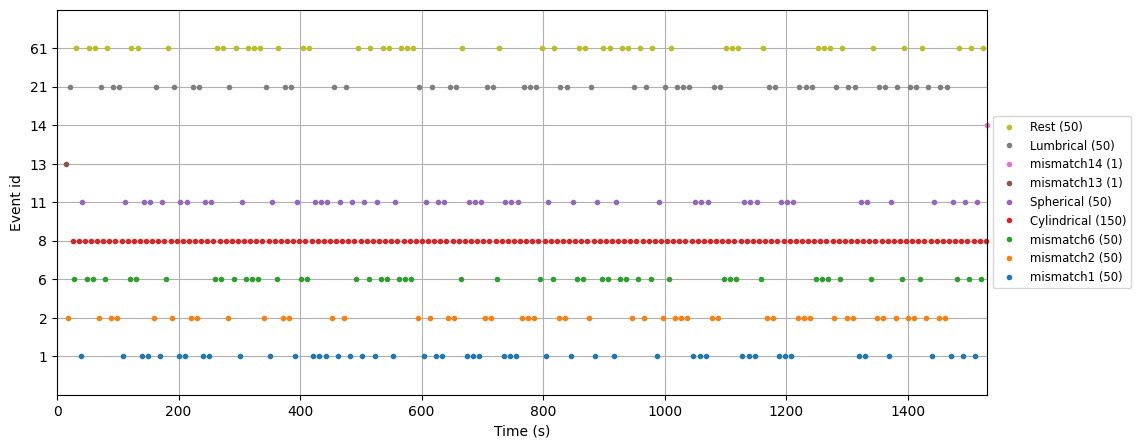

In [13]:
fig, ax = plt.subplots(figsize=[15, 5])

mne.viz.plot_events(events, raw.info['sfreq'],  
                    event_id=event_mapping,                    
                    axes=ax)
plt.show()

In [21]:
# Load filtered raw data

raw_data = mne.io.read_raw_fif(fif_dir + '/EEG_%s.fif'%file_name)
raw_filt = raw.filter(l_freq=4,h_freq=40)
# Epoching settings
tmin =  -.200  # start of each epoch (in sec)
tmax =  1.000  # end of each epoch (in sec)
baseline = (None, 0)

# Create epochs
epochs = mne.Epochs(raw_filt,
                    events, event_mapping,
                    tmin, tmax,
                    baseline=baseline, 
                    preload=True
                   ) 

In [22]:
epochs

Number of events,452
Events,Cylindrical: 150Lumbrical: 50Rest: 50Spherical: 50mismatch1: 50mismatch13: 1mismatch14: 1mismatch2: 50mismatch6: 50
Time range,-0.200 – 1.000 s
Baseline,-0.200 – 0.000 s


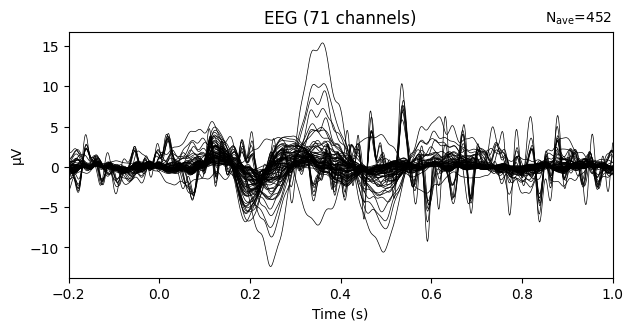

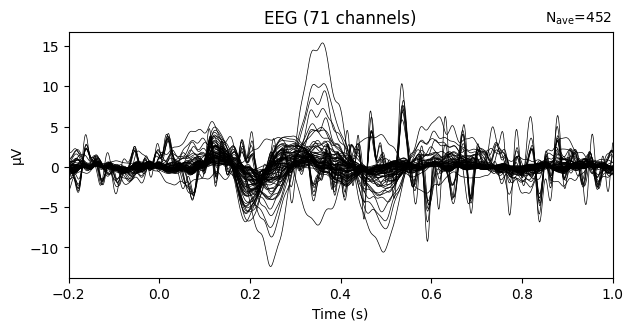

In [23]:
epochs.average().plot(spatial_colors=True)

In [56]:
len(raw.ch_names)

71

In [30]:
from scipy.io import loadmat 
data=loadmat(root + '/EEG_%s.mat'%file_name)

In [60]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'mrk', 'mnt', 'nfo', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16', 'ch17', 'ch18', 'ch19', 'ch20', 'ch21', 'ch22', 'ch23', 'ch24', 'ch25', 'ch26', 'ch27', 'ch28', 'ch29', 'ch30', 'ch31', 'ch32', 'ch33', 'ch34', 'ch35', 'ch36', 'ch37', 'ch38', 'ch39', 'ch40', 'ch41', 'ch42', 'ch43', 'ch44', 'ch45', 'ch46', 'ch47', 'ch48', 'ch49', 'ch50', 'ch51', 'ch52', 'ch53', 'ch54', 'ch55', 'ch56', 'ch57', 'ch58', 'ch59', 'ch60', 'dat'])

In [57]:
len(data.ch_names)

AttributeError: 'dict' object has no attribute 'ch_names'

In [41]:
data['mnt'].shape
channel_names = [s[0] for s in data['nfo']['clab'][0][0][0]]

In [62]:
len(channel_names)

60

In [63]:
data.info

AttributeError: 'dict' object has no attribute 'info'

In [42]:
digimontage = mne.channels.DigMontage(dig=data['mnt'], ch_names=channel_names)

TypeError: dig must be an instance of list, got <class 'numpy.ndarray'> instead.

In [45]:
mne.channels.get_builtin_montages(descriptions=False)

['standard_1005',
 'standard_1020',
 'standard_alphabetic',
 'standard_postfixed',
 'standard_prefixed',
 'standard_primed',
 'biosemi16',
 'biosemi32',
 'biosemi64',
 'biosemi128',
 'biosemi160',
 'biosemi256',
 'easycap-M1',
 'easycap-M10',
 'easycap-M43',
 'EGI_256',
 'GSN-HydroCel-32',
 'GSN-HydroCel-64_1.0',
 'GSN-HydroCel-65_1.0',
 'GSN-HydroCel-128',
 'GSN-HydroCel-129',
 'GSN-HydroCel-256',
 'GSN-HydroCel-257',
 'mgh60',
 'mgh70',
 'artinis-octamon',
 'artinis-brite23',
 'brainproducts-RNP-BA-128']

In [47]:
digimontage = mne.channels.make_standard_montage('standard_1005', head_size='auto')

In [53]:
digimontage

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 343 channels>

In [50]:
#raw.set_montage(digimontage)

In [51]:
# Specify times to plot at, as [min],[max],[stepsize]
# times = np.arange(0, tmax, 0.1)

# epochs.average().plot_topomap(times=times, average=0.050)

In [52]:
mne.viz.plot_montage(digimontage, scale_factor=20, show_names=True, kind='topomap', show=True, sphere=None, *, axes=None, verbose=None)

SyntaxError: iterable argument unpacking follows keyword argument unpacking (2762112989.py, line 1)